Logistic Regression on the Titanic Dataset

## Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. Of the estimated 2,224 passengers and crew, more than 1,500 lost their lives. One of the key factors influencing survival was the "women and children first" policy, which suggests that gender and age played a significant role in determining who survived.

In this lab, we analyze the `train.csv` dataset from the [Kaggle Titanic competition](https://www.kaggle.com/competitions/titanic/data) to build a **logistic regression model** that predicts the probability of survival based on two key predictors: **Sex** and **Age**.

We use `statsmodels` to fit the model and perform diagnostic checks, including handling missing data, assessing linearity in the logit, checking for multicollinearity, and exploring interaction and nonlinear effects.

## Objective

The main objectives of this lab are:

1. **Preprocess the data**:
   - Convert the `Sex` column into a binary variable (`male` → 1, `female` → 0).
   - Handle missing values in the `Age` column using **Random Forest imputation**.

2. **Build a logistic regression model**:
   - Use `Survived` as the dependent variable (DV).
   - Use `Sex` and `Age` as independent variables (IVs).

3. **Handle the `MissingDataError`**:
   - Diagnose and resolve the `"exog contains inf or nans"` error by identifying and treating missing or invalid values.

4. **Model diagnostics**:
   - Check assumptions of logistic regression.
   - Perform VIF analysis for multicollinearity.
   - Use the **Box-Tidwell test** (via interaction with log-transformed age) to assess linearity in the logit.
   - Visualize predicted probabilities using **B-splines** and **interaction terms**.

5. **Enhance the model**:
   - Include **nonlinear effects** using B-splines.
   - Test **interaction effects** between `Sex` and `Age`.
   - Visualize survival probability trends across age and gender.

By the end of this lab, you will understand how to properly prepare data, fit a logistic regression model, interpret results, and improve model fit using advanced techniques in Python.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [ ]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Sex']=df['Sex'].map({'male':1,'female':0})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder



df_encoded = df.drop(['Cabin', 'Name', 'Ticket','Embarked'], axis=1)






In [ ]:

known_age = df_encoded[df_encoded['Age'].notnull()]
unknown_age = df_encoded[df_encoded['Age'].isnull()]


In [ ]:
X_train = known_age.drop('Age', axis=1)
y_train = known_age['Age']

X_test = unknown_age.drop('Age', axis=1)

# Random Forest handles non-linearities and mixed types well
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict missing ages
predicted_ages = model.predict(X_test)

# Fill in predicted ages
df.loc[df['Age'].isnull(), 'Age'] = predicted_ages.astype(int)


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Only numerical variables
print(df[['Survived', 'Sex', 'Age']].corr())


          Survived       Sex       Age
Survived  1.000000 -0.543351 -0.075529
Sex      -0.543351  1.000000  0.116985
Age      -0.075529  0.116985  1.000000


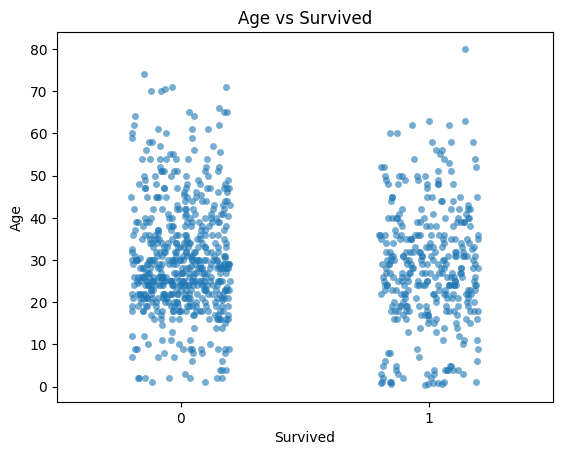

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Jitter to see binary outcome better
sns.stripplot(x='Survived', y='Age', data=df, jitter=0.2, alpha=0.6)
plt.title('Age vs Survived')
plt.show()


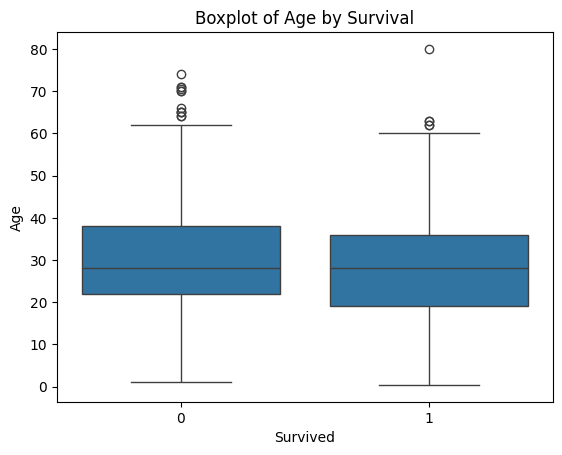

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Boxplot of Age by Survival')
plt.show()


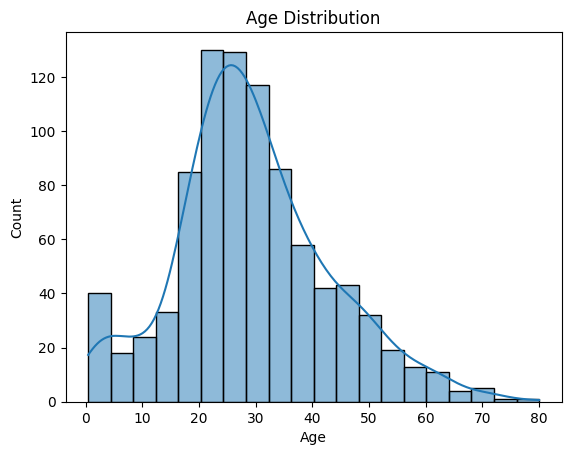

In [ ]:
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


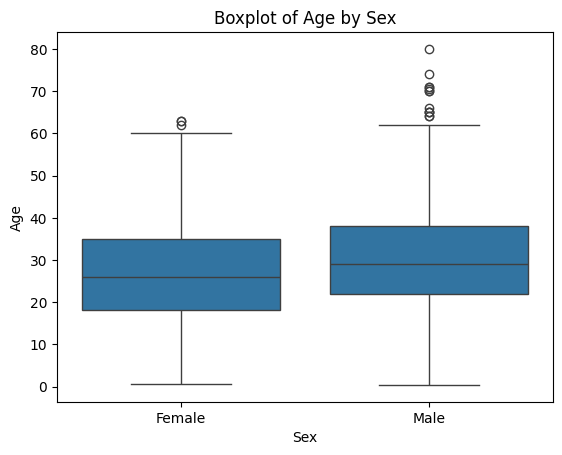

In [ ]:
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Boxplot of Age by Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


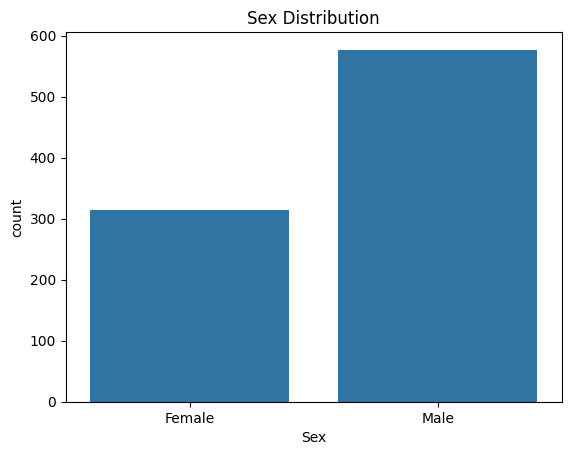

In [ ]:
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


In [ ]:
import statsmodels.api as sm

# Define and fit model
X = df[['Sex', 'Age']].copy() # Create a new DataFrame with selected columns
X = sm.add_constant(X)
y = df['Survived'] # Use Survived from df_encoded as well

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.514938
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Sat, 14 Jun 2025   Pseudo R-squ.:                  0.2267
Time:                        18:03:06   Log-Likelihood:                -458.81
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.799e-59
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1279      0.211      5.345      0.000       0.714       1.542
Sex           -2.5057      0.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm # Import statsmodels.api as sm

# Compute VIF
X_no_const = df[['Sex', 'Age']]
X_with_const = sm.add_constant(X_no_const) # Use sm.add_constant

vif_data = pd.DataFrame()
vif_data['Variable'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

  Variable       VIF
0    const  6.879865
1      Sex  1.013875
2      Age  1.013875


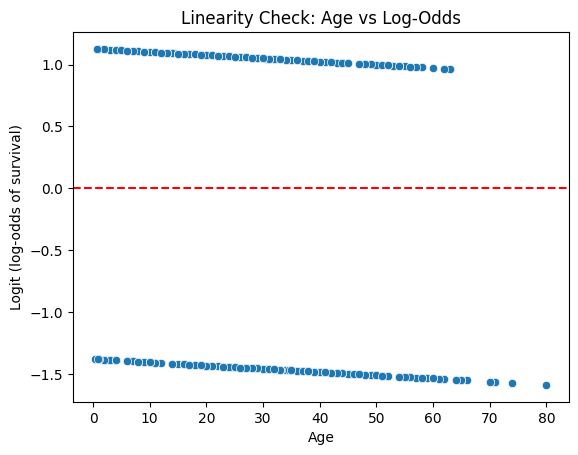

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the log-odds (fitted values in logit space)
pred_probs = model.predict(X)
logit = np.log(pred_probs / (1 - pred_probs))

# Plot logit vs Age
sns.scatterplot(x=df['Age'], y=logit)
plt.title('Linearity Check: Age vs Log-Odds')
plt.xlabel('Age')
plt.ylabel('Logit (log-odds of survival)')
plt.axhline(0, linestyle='--', color='red')
plt.show()


In [ ]:
# Create age bins (e.g., equal-width)
df['age_bin'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 80], labels=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,2


In [ ]:
import statsmodels.api as sm

# Add interaction term: age * log(age)
df['age_log'] = df['Age'] * np.log(df['Age'])

# Prepare design matrix
X = sm.add_constant(df[['Age', 'age_log', 'Sex']])
y = df['Survived']

# Logistic regression with Box-Tidwell test
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.510988
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 Jun 2025   Pseudo R-squ.:                  0.2326
Time:                        18:04:06   Log-Likelihood:                -455.29
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.497e-59
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0915      0.422      4.960      0.000       1.265       2.918
Age           -0.1707      0.

 Variable	Coefficient	p-value	  Interpretation <BR>
  age_log	  0.0388	   0.007	  Significant → nonlinearity detected

In [ ]:
from patsy import dmatrix
import statsmodels.api as sm

df['age_squared'] = df['Age'] ** 2


# Assume df is your Titanic DataFrame and 'age' has no nulls
spline_age = dmatrix("bs(Age, df=4, include_intercept=False)", data=df, return_type='dataframe')

# Combine with other predictors
X = pd.concat([spline_age, df['Sex']], axis=1)
X = sm.add_constant(X)

y = df['Survived']

# Fit the logistic regression
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.503006
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 14 Jun 2025   Pseudo R-squ.:                  0.2446
Time:                        18:35:17   Log-Likelihood:                -448.18
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.219e-60
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     

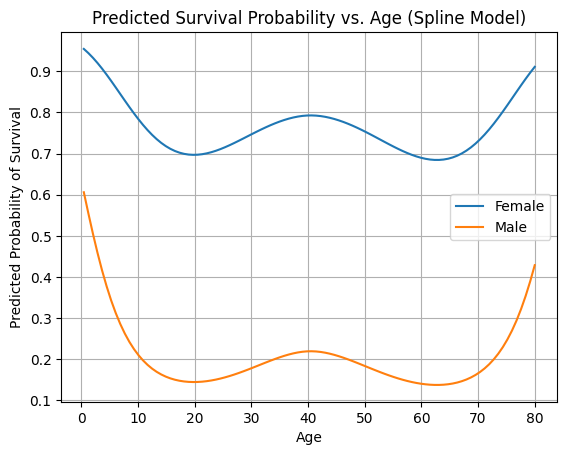

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix

# Create a range of ages for prediction
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100)

# Generate spline basis for age
spline_basis = dmatrix("bs(age_range, df=4, include_intercept=False)", {"age_range": age_range}, return_type='dataframe')

# Predict for both sexes: Female (0), Male (1)
for sex_val, label in zip([0, 1], ['Female', 'Male']):
    # Create full X matrix with constant + spline + sex
    X_pred = pd.concat([spline_basis.reset_index(drop=True), pd.Series(sex_val, index=age_range, name='Sex').reset_index(drop=True)], axis=1)
    X_pred = sm.add_constant(X_pred, prepend=False)


    # Predict
    pred_probs = result.predict(X_pred)

    # Plot
    plt.plot(age_range, pred_probs, label=label)

plt.xlabel('Age')
plt.ylabel('Predicted Probability of Survival')
plt.title('Predicted Survival Probability vs. Age (Spline Model)')
plt.legend()
plt.grid(True)
plt.show()

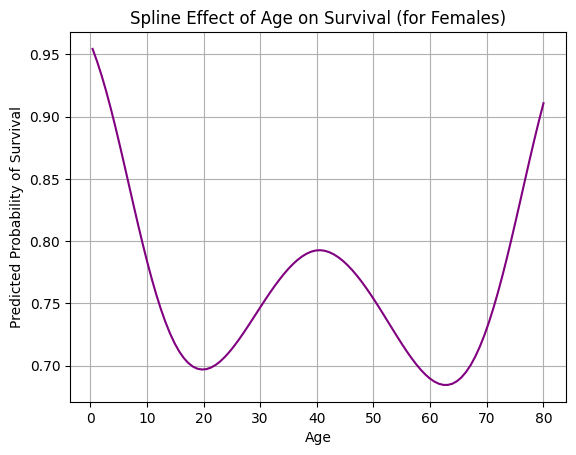

In [ ]:
spline_basis = dmatrix("bs(age_range, df=4, include_intercept=False)", {"age_range": age_range}, return_type='dataframe')
X_pred_spline = pd.concat([spline_basis.reset_index(drop=True), pd.Series(0, index=age_range, name='Sex').reset_index(drop=True)], axis=1)
X_pred_spline = sm.add_constant(X_pred_spline)

# Predict
pred_probs_age = result.predict(X_pred_spline)

# Plot
plt.plot(age_range, pred_probs_age, color='purple')
plt.xlabel('Age')
plt.ylabel('Predicted Probability of Survival')
plt.title('Spline Effect of Age on Survival (for Females)')
plt.grid(True)
plt.show()

In [ ]:
# Create interaction term
df['sex_age'] = df['Sex'] * df['Age']

# Model with interaction
X_inter = sm.add_constant(df[['Age', 'Sex', 'sex_age']])
y = df['Survived']

interaction_model = sm.Logit(y, X_inter).fit()
print(interaction_model.summary())


Optimization terminated successfully.
         Current function value: 0.507752
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 Jun 2025   Pseudo R-squ.:                  0.2375
Time:                        18:35:30   Log-Likelihood:                -452.41
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.464e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3982      0.288      1.381      0.167      -0.167       0.963
Age            0.0251      0.

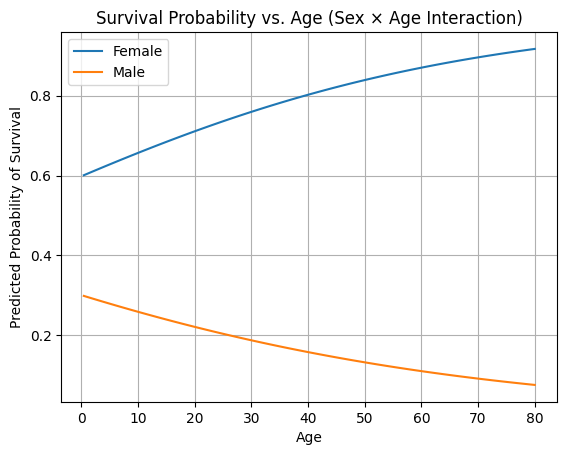

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create age range
age_vals = np.linspace(df['Age'].min(), df['Age'].max(), 100)

# Predict for both sexes
for sex_val, label in zip([0, 1], ['Female', 'Male']):
    X_pred = pd.DataFrame({
        'const': 1,
        'Age': age_vals,
        'Sex': sex_val,
        'sex_age': sex_val * age_vals
    })
    preds = interaction_model.predict(X_pred)
    plt.plot(age_vals, preds, label=label)

plt.xlabel('Age')
plt.ylabel('Predicted Probability of Survival')
plt.title('Survival Probability vs. Age (Sex × Age Interaction)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Create spline terms for Age and interact them with Sex using patsy
# This approach handles the interaction correctly and avoids multicollinearity
X_full = dmatrix("bs(Age, df=4, include_intercept=False) * Sex", data=df, return_type='dataframe')

# Add Sex as a main effect as well, since the interaction term is only present when Sex is 1
X_full['Sex'] = df['Sex']


X_full = sm.add_constant(X_full)

y = df['Survived']

interaction_model_spline = sm.Logit(y, X_full).fit()
print(interaction_model_spline.summary())

Optimization terminated successfully.
         Current function value: 0.489966
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Sat, 14 Jun 2025   Pseudo R-squ.:                  0.2642
Time:                        18:35:35   Log-Likelihood:                -436.56
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.500e-62
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                             

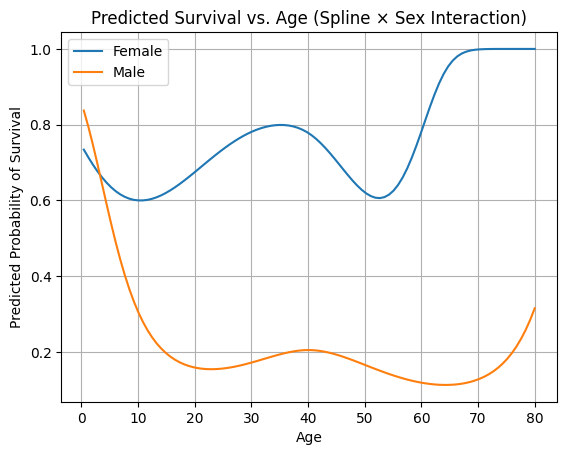

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix
import pandas as pd # Import pandas

# Define prediction range
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100)

# Plot predictions for both sexes
for sex_val, label in zip([0, 1], ['Female', 'Male']):
    # Create a dictionary for dmatrix with age_range and the current sex value
    data = {'age_range': age_range, 'Sex': pd.Series(sex_val, index=age_range)}

    # Create design matrix for prediction using dmatrix with the full formula
    # This includes the spline basis terms for age, the Sex main effect, and their interactions
    X_pred = dmatrix("bs(age_range, df=4, include_intercept=False) * Sex + Sex", data=data, return_type='dataframe')

    # Add constant
    X_pred = sm.add_constant(X_pred, prepend=False)

    # Ensure column names match the training data
    X_pred.columns = interaction_model_spline.model.exog_names


    # Predict
    preds = interaction_model_spline.predict(X_pred)

    # Plot
    plt.plot(age_range, preds, label=label)

plt.xlabel('Age')
plt.ylabel('Predicted Probability of Survival')
plt.title('Predicted Survival vs. Age (Spline × Sex Interaction)')
plt.legend()
plt.grid(True)
plt.show()